In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [10]:
# Data Preperation
X,Y= make_blobs(n_samples=500,centers=5,random_state= 3)
print(Y)
print(X)

[3 2 1 3 3 1 4 3 2 3 2 1 2 3 1 3 2 3 3 2 0 0 3 1 3 0 4 4 1 4 3 4 0 0 3 0 2
 2 3 0 0 0 4 4 1 2 2 1 4 4 2 3 4 3 3 0 3 3 2 1 2 1 1 3 4 2 1 1 0 1 0 3 0 3
 0 1 3 4 0 0 1 0 1 4 2 4 1 2 4 1 4 0 3 0 0 2 3 1 1 0 2 0 1 1 2 2 2 1 1 3 2
 4 3 2 1 0 2 4 0 1 2 1 4 3 0 4 4 4 3 3 1 1 3 2 2 4 1 4 1 3 3 0 1 2 4 3 2 2
 3 1 3 3 1 1 2 0 0 4 1 3 0 2 4 0 2 0 2 0 0 0 4 3 0 2 0 4 3 1 2 4 2 3 2 0 4
 4 0 3 1 2 0 1 4 3 4 0 1 4 3 3 3 0 0 2 3 4 4 3 2 3 3 3 0 2 1 2 3 3 2 4 1 4
 4 0 3 1 3 1 4 0 1 1 3 0 3 0 1 2 1 0 0 2 3 3 1 1 0 2 0 3 4 2 4 3 4 4 4 4 2
 0 2 3 0 2 4 1 2 2 2 4 3 3 1 0 0 2 1 1 3 1 4 1 2 2 4 3 0 4 4 2 0 3 1 0 1 4
 1 1 2 3 0 2 0 0 3 4 0 1 0 4 3 3 1 2 0 4 2 0 1 4 2 4 3 0 4 1 1 0 0 0 3 4 0
 3 2 1 1 4 2 2 1 1 4 0 0 0 3 4 2 4 3 0 2 2 1 0 0 4 0 4 1 1 1 4 0 3 0 1 4 4
 2 3 2 4 3 4 1 2 0 2 1 3 3 2 2 0 2 0 4 1 2 4 3 3 2 1 0 4 3 3 3 4 2 0 2 2 2
 4 0 1 2 1 1 4 1 3 1 3 2 0 0 3 2 4 3 0 1 2 4 1 4 4 2 4 1 4 2 4 1 4 3 0 0 4
 0 2 0 0 4 3 3 1 4 0 1 4 1 2 1 2 3 0 1 3 1 3 3 0 3 0 4 2 2 1 3 3 4 4 2 4 4
 2 4 2 2 2 1 0 4 1 2 1 1 

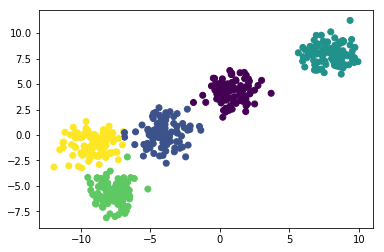

In [11]:
#visualize the data
#color= Label

plt.figure(0)
plt.scatter(X[:,0],X[:,1],c=Y) #unsupervised learning, all the data looks the same
plt.show()

In [12]:
#generating one random at a point that will be referred as center
center = 10*(2*np.random.random((X.shape[1],))-1)
print(center) #everytime there will be randome center

[-9.68361072  1.71857372]


In [13]:
# so as we have 5 different clusters, we will generate 5 different centers
k = 5

color  = ["green","red","blue","yellow","orange"]

clusters = {}
# we make center for each clustr and assign cnter, color to that cluster through a dictionary
for i in range(k):
    #initially our centers are random
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    #infomation for each cluster. Each cluster contains center, points,color
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    
    clusters[i] = cluster


In [14]:
clusters

{0: {'center': array([-3.78185967,  0.88295244]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 2.30337824, -0.66338274]),
  'points': [],
  'color': 'red'},
 2: {'center': array([-8.66507639, -2.22644701]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-5.64636567, -0.12922187]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([ 9.94489127, -0.28899339]),
  'points': [],
  'color': 'orange'}}

In [15]:
# distance between two vectors , just like KNN
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [18]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters): #E-Step, calculates distance
    for ix in range(X.shape[0]):
        #all the calculated distnaces will be stored here
        dist = []
        #point
        curr_x = X[ix]

        for kx in range(k):
            #calculates distance of particular point to all the centers
            d = distance(curr_x,clusters[kx]['center'])
            #append that distance to distance list
            dist.append(d)
        #pick the one with the minimum distance
        current_cluster = np.argmin(dist) 
        #append that point to that cluster with minimum distance
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    #mean of the points results in changing of the graph 
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        # M Step, calculates mean
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            #update that cluster by taking the mean, graph changes
            new_u = pts.mean(axis=0) #points ka mean
            clusters[kx]['center'] = new_u #new center accoridng to new points
            clusters[kx]['points'] = [] #Clear the list  

def plotClusters(clusters):
    
    for kx in range(k):
        print(len(clusters[kx]['points']))
        
        
        pts = np.array(clusters[kx]['points'])
        print(pts.shape)
        
        #Plot the points , plotting the clusters with color
        try:
            #pts has all the point in [0] and [1] column, scatter then acording to the color
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center, randomly
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
#as our centers were random our graph is with random centers by the above code

0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)


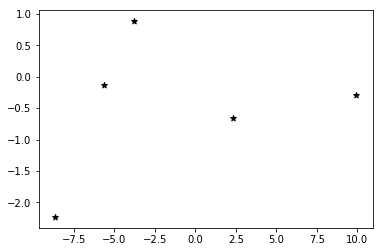

In [19]:

plotClusters(clusters)

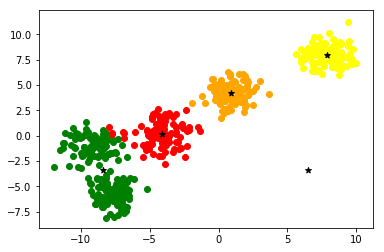

In [72]:
#optimization happen here when we repeat both the steps again and again
# Repeat this cell few times or put it inside a loop
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

# Using SciKit Learn


In [23]:
from sklearn.cluster import KMeans


In [34]:
kmeans= KMeans(n_clusters=5)
kmeans.fit(X,Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
centers=kmeans.cluster_centers_ #calculated the centers by itself

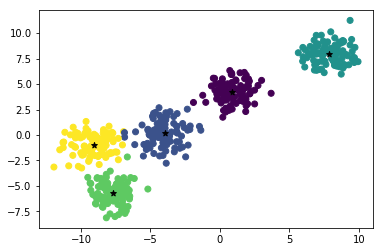

In [37]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(centers[:,0],centers[:,1],color="black",marker='*')
plt.show()